# II. PRZETWARZANIE WSTĘPNE DANYCH

Import niezbędnych bibliotek.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### I Pozyskanie danych

Wczytanie zbioru danych nieprzetworzonych

In [2]:
temps = pd.read_csv('GlobalTemperatures.csv', parse_dates=['dt']).set_index('dt')

In [3]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3192 entries, 1750-01-01 to 2015-12-01
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LandAverageTemperature                     3180 non-null   float64
 1   LandAverageTemperatureUncertainty          3180 non-null   float64
 2   LandMaxTemperature                         1992 non-null   float64
 3   LandMaxTemperatureUncertainty              1992 non-null   float64
 4   LandMinTemperature                         1992 non-null   float64
 5   LandMinTemperatureUncertainty              1992 non-null   float64
 6   LandAndOceanAverageTemperature             1992 non-null   float64
 7   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8)
memory usage: 224.4 KB


In [4]:
temps.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


Skrócenie nazw kolum.

In [5]:
temps.index.name = 'date'
temps.rename(columns={
    "LandAverageTemperature" : "landAvg", 
    "LandAverageTemperatureUncertainty" : "landAvgUncertainty", 
    "LandMaxTemperature" : "landMax", 
    "LandMaxTemperatureUncertainty" : "landMaxUncertainty", 
    "LandMinTemperature" : "landMin", 
    "LandMinTemperatureUncertainty" : "landMinUncertainty",
    "LandAndOceanAverageTemperature" : "land&OceanAvg",
    "LandAndOceanAverageTemperatureUncertainty" : "land&OceanAvgUncertainty"    
}, inplace=True)

temps.head()

,landAvg,landAvgUncertainty,landMax,landMaxUncertainty,landMin,landMinUncertainty,land&OceanAvg,land&OceanAvgUncertainty
date,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


Sprawdzenie liczby nieokreslonych warości pól dla kolumn.

In [6]:
temps.isna().sum()

landAvg                       12
landAvgUncertainty            12
landMax                     1200
landMaxUncertainty          1200
landMin                     1200
landMinUncertainty          1200
land&OceanAvg               1200
land&OceanAvgUncertainty    1200
dtype: int64

Usunięcie rekordów co najmniej 3 wartościami nieokreslonymi (NaN).

In [7]:
temps.dropna(axis=0, thresh=3, inplace=True)

In [8]:
temps.isna().sum()

landAvg                     0
landAvgUncertainty          0
landMax                     0
landMaxUncertainty          0
landMin                     0
landMinUncertainty          0
land&OceanAvg               0
land&OceanAvgUncertainty    0
dtype: int64

In [9]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1992 entries, 1850-01-01 to 2015-12-01
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   landAvg                   1992 non-null   float64
 1   landAvgUncertainty        1992 non-null   float64
 2   landMax                   1992 non-null   float64
 3   landMaxUncertainty        1992 non-null   float64
 4   landMin                   1992 non-null   float64
 5   landMinUncertainty        1992 non-null   float64
 6   land&OceanAvg             1992 non-null   float64
 7   land&OceanAvgUncertainty  1992 non-null   float64
dtypes: float64(8)
memory usage: 140.1 KB


Uzupełnienie brakujących wartości pomiarów z wykorzystaniem interpolacji liniowej.

In [10]:
#temps = temps.interpolate(method='linear', limit_direction ='backward')
#temps = temps.fillna(temps.median(), inplace=True)

temps.head()

,landAvg,landAvgUncertainty,landMax,landMaxUncertainty,landMin,landMinUncertainty,land&OceanAvg,land&OceanAvgUncertainty
date,,,,,,,,
1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


In [11]:
temps.describe()

,landAvg,landAvgUncertainty,landMax,landMaxUncertainty,landMin,landMinUncertainty,land&OceanAvg,land&OceanAvgUncertainty
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.571583,0.276663,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.263193,0.224030,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,0.404000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.430000,0.099750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.850500,0.230000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.858500,0.347250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,15.482000,1.492000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


Wywnioskowanie na podstawie rozpatrywaneg zbioru danych średnich temperatur oceanów oraz niepewności ich pomiarów.

landAndOceanAvg = (landAgv + oceanAvg) / 2 -> oceanAvg = landAndOceanAvg * 2 - landAvg

In [12]:
oceanAvg = [landAndOceanAvg*2 - landAvg for landAvg, landAndOceanAvg in zip(temps['landAvg'], temps['land&OceanAvg'])]
oceanAvgUncertainty = [landAndOceanAvgUncertainty*2 - landAvgUncertainty 
                       for landAvgUncertainty, landAndOceanAvgUncertainty 
                       in zip(temps['landAvgUncertainty'], temps['land&OceanAvgUncertainty'])]

In [13]:
temps.insert(loc=len(temps.columns), column='oceanAvg', value=oceanAvg)

In [14]:
temps.insert(loc=len(temps.columns), column='oceanAvgUncertainty', value=oceanAvgUncertainty)

Dodanie kolumny z aplitudami temperatur dla każdego miesiąca.

In [15]:
amplitude = [x - y for x, y in zip(temps['landMax'], temps['landMin'])]

In [16]:
temps.insert(loc=len(temps.columns), column='amplitude', value=amplitude)

In [17]:
temps.head()

,landAvg,landAvgUncertainty,landMax,landMaxUncertainty,landMin,landMinUncertainty,land&OceanAvg,land&OceanAvgUncertainty,oceanAvg,oceanAvgUncertainty,amplitude
date,,,,,,,,,,,
1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,24.917,-0.371,11.448
1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,24.105,-0.447,12.261
1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,23.132,-0.273,12.252
1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,22.117,-0.131,11.916
1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,21.010,-0.119,11.844


Posortowanie danych względem miesięcy, w których wykonywane były pomiarów.

In [18]:
temps['month'] = temps.index.month
temps['year'] = temps.index.year
temps.sort_values(['month', 'year'], inplace=True)
temps.head()

,landAvg,landAvgUncertainty,landMax,landMaxUncertainty,landMin,landMinUncertainty,land&OceanAvg,land&OceanAvgUncertainty,oceanAvg,oceanAvgUncertainty,amplitude,month,year
date,,,,,,,,,,,,,
1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,24.917,-0.371,11.448,1,1850
1851-01-01,2.431,1.122,8.951,2.399,-2.443,1.771,13.245,0.362,24.059,-0.398,11.394,1,1851
1852-01-01,2.376,1.389,8.474,4.240,-2.755,1.705,13.231,0.438,24.086,-0.513,11.229,1,1852
1853-01-01,1.786,1.108,8.972,2.461,-2.818,1.556,13.143,0.356,24.500,-0.396,11.790,1,1853
1854-01-01,1.281,0.977,8.786,2.589,-3.552,1.362,12.983,0.313,24.685,-0.351,12.338,1,1854


Odrzucamy cechy przedstawiające niepewności pomiarów oraz te utworzone na potrzeby pogrupowania wyników względem miesięcy pomiarów.

In [19]:
features_to_keep = ["landAvg", "landMax", "landMin", "land&OceanAvg", "oceanAvg", "amplitude", "month"]

In [20]:
temps = temps[features_to_keep]
temps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1992 entries, 1850-01-01 to 2015-12-01
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   landAvg        1992 non-null   float64
 1   landMax        1992 non-null   float64
 2   landMin        1992 non-null   float64
 3   land&OceanAvg  1992 non-null   float64
 4   oceanAvg       1992 non-null   float64
 5   amplitude      1992 non-null   float64
 6   month          1992 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 124.5 KB


In [21]:
temps.head()

,landAvg,landMax,landMin,land&OceanAvg,oceanAvg,amplitude,month
date,,,,,,,
1850-01-01,0.749,8.242,-3.206,12.833,24.917,11.448,1
1851-01-01,2.431,8.951,-2.443,13.245,24.059,11.394,1
1852-01-01,2.376,8.474,-2.755,13.231,24.086,11.229,1
1853-01-01,1.786,8.972,-2.818,13.143,24.500,11.790,1
1854-01-01,1.281,8.786,-3.552,12.983,24.685,12.338,1


Implementacja metody dodającej do struktury temps kolumnę z pomiarami danej cechy z przed N miesięcy.

In [22]:
def deriveNthPriorFeature(dataframe, N, feature):
    # total number of rows
   # rows = temps.shape[0]
    
    # a list representing Nth prior measurements of feature
    # notice that the front of the list needs to be padded with N
    # None values to maintain the constistent rows length for each N
 #   nth_prior_measurements = [None]*N + [dataframe[feature][j-N] for j in range(N, rows)]

    # make a new column name of feature_N and add to DataFrame
 #   col_name = "{}_{}_PriorYear".format(feature, N)
 #   dataframe[col_name] = nth_prior_measurements
 #   
    first = 0
    last = 0
    nth_prior_measurements = []
    
    for rows in dataframe.groupby(dataframe.month).count()['landAvg']:
        last += rows
        next_month_nth_measurement = [None]*N + [dataframe[feature][j-N] for j in range(first+N, last)]
        nth_prior_measurements += next_month_nth_measurement 
        first = last

    # make a new column name of feature_N and add to DataFrame
    col_name = "{}_{}_PriorYear".format(feature, N)
    dataframe[col_name] = nth_prior_measurements        

Utworzenie szeregów czasowych dla wartości pomiarów z N ostatnich miesięcy poprzedzających dany pomiar.

In [23]:
# 5 years prior
N = 5

# features selected for predictiors
features = ['landAvg', 'landMax', 'landMin', 'land&OceanAvg', 'oceanAvg', 'amplitude']

for feature in features:
    for n in range(1, N+1, 1):
        deriveNthPriorFeature(temps, n, feature)

In [24]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1992 entries, 1850-01-01 to 2015-12-01
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   landAvg                    1992 non-null   float64
 1   landMax                    1992 non-null   float64
 2   landMin                    1992 non-null   float64
 3   land&OceanAvg              1992 non-null   float64
 4   oceanAvg                   1992 non-null   float64
 5   amplitude                  1992 non-null   float64
 6   month                      1992 non-null   int64  
 7   landAvg_1_PriorYear        1980 non-null   float64
 8   landAvg_2_PriorYear        1968 non-null   float64
 9   landAvg_3_PriorYear        1956 non-null   float64
 10  landAvg_4_PriorYear        1944 non-null   float64
 11  landAvg_5_PriorYear        1932 non-null   float64
 12  landMax_1_PriorYear        1980 non-null   float64
 13  landMax_2_PriorYear        196

In [25]:
temps.describe()

,landAvg,landMax,landMin,land&OceanAvg,oceanAvg,amplitude,month,landAvg_1_PriorYear,landAvg_2_PriorYear,landAvg_3_PriorYear,...,oceanAvg_1_PriorYear,oceanAvg_2_PriorYear,oceanAvg_3_PriorYear,oceanAvg_4_PriorYear,oceanAvg_5_PriorYear,amplitude_1_PriorYear,amplitude_2_PriorYear,amplitude_3_PriorYear,amplitude_4_PriorYear,amplitude_5_PriorYear
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1980.000000,1968.000000,1956.000000,...,1980.000000,1968.000000,1956.000000,1944.000000,1932.000000,1980.000000,1968.000000,1956.000000,1944.000000,1932.000000
mean,8.571583,14.350601,2.743595,15.212566,21.853549,11.607006,6.500000,8.565004,8.558872,8.552445,...,21.850760,21.848293,21.846734,21.845187,21.844083,11.607825,11.608873,11.609771,11.609976,11.610925
std,4.263193,4.309579,4.155835,1.274093,1.789007,0.509819,3.452919,4.262240,4.261836,4.261879,...,1.789518,1.789916,1.790371,1.790400,1.790582,0.510193,0.510593,0.510901,0.511083,0.511444
min,0.404000,5.900000,-5.407000,12.475000,18.780000,9.296000,1.000000,0.404000,0.404000,0.404000,...,18.780000,18.780000,18.780000,18.780000,18.780000,9.296000,9.296000,9.296000,9.296000,9.296000
25%,4.430000,10.212000,-1.334500,14.047000,20.159500,11.300750,3.750000,4.424000,4.420000,4.412500,...,20.142750,20.138750,20.137500,20.137500,20.137500,11.300750,11.301000,11.301000,11.301000,11.301000
50%,8.850500,14.760000,2.949500,15.251000,21.724000,11.644000,6.500000,8.844000,8.837500,8.835500,...,21.716000,21.708500,21.708500,21.708500,21.708500,11.644000,11.644500,11.645000,11.645000,11.645000
75%,12.858500,18.451500,6.778750,16.396250,23.627500,11.934250,9.250000,12.856500,12.853750,12.835000,...,23.625500,23.624250,23.624000,23.622500,23.622000,11.935250,11.936500,11.938250,11.938250,11.940250
max,15.482000,21.320000,9.715000,17.611000,25.072000,13.346000,12.000000,15.482000,15.482000,15.482000,...,25.072000,25.072000,25.072000,25.072000,25.072000,13.346000,13.346000,13.346000,13.346000,13.346000


In [59]:
temps.head()

,landAvg,landMax,landMin,land&OceanAvg,oceanAvg,amplitude,landAvg_1_PriorYear,landAvg_2_PriorYear,landAvg_3_PriorYear,landAvg_4_PriorYear,...,oceanAvg_1_PriorYear,oceanAvg_2_PriorYear,oceanAvg_3_PriorYear,oceanAvg_4_PriorYear,oceanAvg_5_PriorYear,amplitude_1_PriorYear,amplitude_2_PriorYear,amplitude_3_PriorYear,amplitude_4_PriorYear,amplitude_5_PriorYear
date,,,,,,,,,,,,,,,,,,,,,
1850-01-01,0.749,8.242,-3.206,12.833,24.917,11.448,2.836,2.836,2.836,2.836,...,24.586,24.586,24.586,24.586,24.586,10.872,10.872,10.872,10.872,10.872
1851-01-01,2.431,8.951,-2.443,13.245,24.059,11.394,2.836,2.836,2.836,2.836,...,24.586,24.586,24.586,24.586,24.586,10.872,10.872,10.872,10.872,10.872
1852-01-01,2.376,8.474,-2.755,13.231,24.086,11.229,2.431,2.836,2.836,2.836,...,24.059,24.586,24.586,24.586,24.586,11.394,10.872,10.872,10.872,10.872
1853-01-01,1.786,8.972,-2.818,13.143,24.500,11.790,2.376,2.431,2.836,2.836,...,24.086,24.059,24.586,24.586,24.586,11.229,11.394,10.872,10.872,10.872
1854-01-01,1.281,8.786,-3.552,12.983,24.685,12.338,1.786,2.376,2.431,2.836,...,24.500,24.086,24.059,24.586,24.586,11.790,11.229,11.394,10.872,10.872


Interpolacja liniowa brakujących danych.

In [27]:
temps = temps.interpolate(method='linear', limit_direction ='backward')
#temps = temps.fillna(temps.median(), inplace=True)

In [28]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1992 entries, 1850-01-01 to 2015-12-01
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   landAvg                    1992 non-null   float64
 1   landMax                    1992 non-null   float64
 2   landMin                    1992 non-null   float64
 3   land&OceanAvg              1992 non-null   float64
 4   oceanAvg                   1992 non-null   float64
 5   amplitude                  1992 non-null   float64
 6   month                      1992 non-null   int64  
 7   landAvg_1_PriorYear        1992 non-null   float64
 8   landAvg_2_PriorYear        1992 non-null   float64
 9   landAvg_3_PriorYear        1992 non-null   float64
 10  landAvg_4_PriorYear        1992 non-null   float64
 11  landAvg_5_PriorYear        1992 non-null   float64
 12  landMax_1_PriorYear        1992 non-null   float64
 13  landMax_2_PriorYear        199

In [29]:
temps.head()

,landAvg,landMax,landMin,land&OceanAvg,oceanAvg,amplitude,month,landAvg_1_PriorYear,landAvg_2_PriorYear,landAvg_3_PriorYear,...,oceanAvg_1_PriorYear,oceanAvg_2_PriorYear,oceanAvg_3_PriorYear,oceanAvg_4_PriorYear,oceanAvg_5_PriorYear,amplitude_1_PriorYear,amplitude_2_PriorYear,amplitude_3_PriorYear,amplitude_4_PriorYear,amplitude_5_PriorYear
date,,,,,,,,,,,,,,,,,,,,,
1850-01-01,0.749,8.242,-3.206,12.833,24.917,11.448,1,2.836,2.836,2.836,...,24.586,24.586,24.586,24.586,24.586,10.872,10.872,10.872,10.872,10.872
1851-01-01,2.431,8.951,-2.443,13.245,24.059,11.394,1,2.836,2.836,2.836,...,24.586,24.586,24.586,24.586,24.586,10.872,10.872,10.872,10.872,10.872
1852-01-01,2.376,8.474,-2.755,13.231,24.086,11.229,1,2.431,2.836,2.836,...,24.059,24.586,24.586,24.586,24.586,11.394,10.872,10.872,10.872,10.872
1853-01-01,1.786,8.972,-2.818,13.143,24.500,11.790,1,2.376,2.431,2.836,...,24.086,24.059,24.586,24.586,24.586,11.229,11.394,10.872,10.872,10.872
1854-01-01,1.281,8.786,-3.552,12.983,24.685,12.338,1,1.786,2.376,2.431,...,24.500,24.086,24.059,24.586,24.586,11.790,11.229,11.394,10.872,10.872


### II Wstępne przetworzenie danych

Wstepna analiza pozyskanych danych.

In [30]:
# method that return data description list
def dataSpread(dataframe):    
    # Call describe on df and transpose it due to the large number of columns
    spread = dataframe.describe().T

    # precalculate interquartile range for ease of use in next calculation
    IQR = spread['75%'] - spread['25%']

    # create an outliers column which is either 3 IQRs below the first quartile or
    # 3 IQRs above the third quartile
    spread['outliers'] = (spread['min']<(spread['25%']-(3*IQR)))|(spread['max'] > (spread['75%']+3*IQR))
    
    # count number of outliers in a given dataframe
    outliers_no = []
    for feature in spread.index:
        if spread.loc[feature]['outliers'] & True:
            counter = 0
            Q1 = spread.loc[feature,'25%']
            Q3 = spread.loc[feature, '75%']
            IQR = Q3 - Q1
            left_limiter = Q1-(3*IQR)
            right_limiter = Q3+3*IQR
            for value in dataframe[feature]:
                if (value < left_limiter) | (value > (right_limiter)) :
                    counter += 1
                    
            outliers_no.append(counter)
            #spread['outliersNo'][feature] = counter
        else:
            outliers_no.append(0)
    
    spread['outliersNo'] = outliers_no

    # return features with their's characteristics
    return spread

In [31]:
dataSpread(temps)

,count,mean,std,min,25%,50%,75%,max,outliers,outliersNo
landAvg,1992.0,8.571583,4.263193,0.404,4.430000,8.8505,12.85850,15.482,False,0
landMax,1992.0,14.350601,4.309579,5.900,10.212000,14.7600,18.45150,21.320,False,0
landMin,1992.0,2.743595,4.155835,-5.407,-1.334500,2.9495,6.77875,9.715,False,0
land&OceanAvg,1992.0,15.212566,1.274093,12.475,14.047000,15.2510,16.39625,17.611,False,0
oceanAvg,1992.0,21.853549,1.789007,18.780,20.159500,21.7240,23.62750,25.072,False,0
amplitude,1992.0,11.607006,0.509819,9.296,11.300750,11.6440,11.93425,13.346,True,1
month,1992.0,6.500000,3.452919,1.000,3.750000,6.5000,9.25000,12.000,False,0
landAvg_1_PriorYear,1992.0,8.566050,4.261852,0.404,4.424000,8.8440,12.85850,15.482,False,0
landAvg_2_PriorYear,1992.0,8.561318,4.260708,0.404,4.424000,8.8375,12.83700,15.482,False,0
landAvg_3_PriorYear,1992.0,8.555802,4.261907,0.404,4.412500,8.8375,12.85375,15.482,False,0


Jak wynika z powyżej zamieszczonej tabeli, wartości odstające stanowią znikomu procent wszystkich pomiarów, z tego względu zostaną pozostawione bez zmian.

Zobrazowanie rozkładów cech wiodących.

In [32]:
# method that displays distribiutions of data for selected features of given dataframe
def displayHist(dataframe):
    pd.DataFrame(dataframe, columns=['landAvg', 'landMax', 'landMin', 'land&OceanAvg', 'oceanAvg', 'amplitude']).hist(figsize = (25, 25), alpha = 0.8)

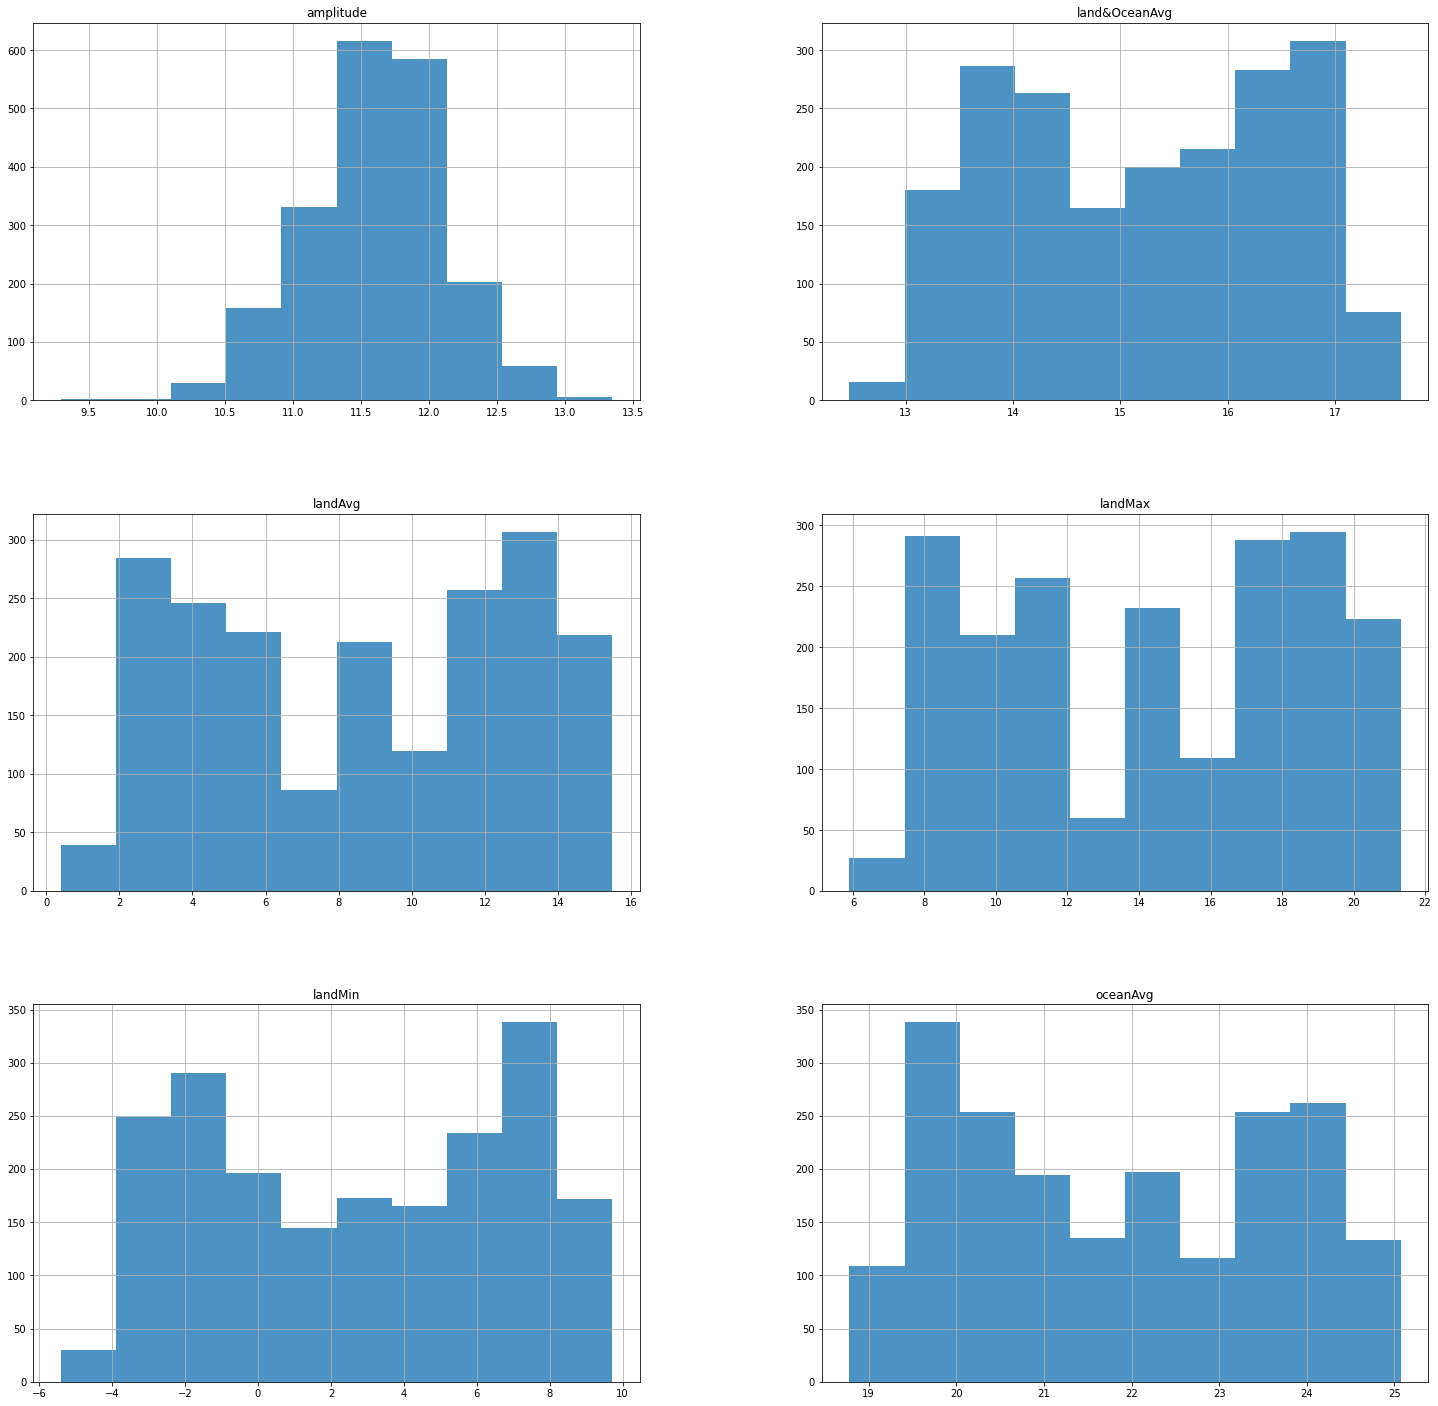

In [33]:
displayHist(temps)

Warto zauważyć, iż jedynie histogram dla danych przedstawiających aplitudy ma rozkład zbliżony do normalnego (z tendencją odchylu danych w stronę kwartylu I-szego - ang. left-skewd). Kolejną obserwacją, na która może okazać się istotna jest multimodalność wykresów dotyczących średniej temperatury lądów i oceanów (land&OceanAvg), średnią temperaturą lądów (landAvg) oraz maksylaną temperaturą lądów (landMax).

Usunięcie kolumny pomocniczej z miesiącami dokonania pomiarów.

In [34]:
temps.drop(['month'], axis='columns', inplace=True)

In [35]:
temps = temps.dropna()

Usunięcie rekordów z brakującymi danymi (z wartościami NaN).

In [36]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1992 entries, 1850-01-01 to 2015-12-01
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   landAvg                    1992 non-null   float64
 1   landMax                    1992 non-null   float64
 2   landMin                    1992 non-null   float64
 3   land&OceanAvg              1992 non-null   float64
 4   oceanAvg                   1992 non-null   float64
 5   amplitude                  1992 non-null   float64
 6   landAvg_1_PriorYear        1992 non-null   float64
 7   landAvg_2_PriorYear        1992 non-null   float64
 8   landAvg_3_PriorYear        1992 non-null   float64
 9   landAvg_4_PriorYear        1992 non-null   float64
 10  landAvg_5_PriorYear        1992 non-null   float64
 11  landMax_1_PriorYear        1992 non-null   float64
 12  landMax_2_PriorYear        1992 non-null   float64
 13  landMax_3_PriorYear        199

In [37]:
temps.head()

,landAvg,landMax,landMin,land&OceanAvg,oceanAvg,amplitude,landAvg_1_PriorYear,landAvg_2_PriorYear,landAvg_3_PriorYear,landAvg_4_PriorYear,...,oceanAvg_1_PriorYear,oceanAvg_2_PriorYear,oceanAvg_3_PriorYear,oceanAvg_4_PriorYear,oceanAvg_5_PriorYear,amplitude_1_PriorYear,amplitude_2_PriorYear,amplitude_3_PriorYear,amplitude_4_PriorYear,amplitude_5_PriorYear
date,,,,,,,,,,,,,,,,,,,,,
1850-01-01,0.749,8.242,-3.206,12.833,24.917,11.448,2.836,2.836,2.836,2.836,...,24.586,24.586,24.586,24.586,24.586,10.872,10.872,10.872,10.872,10.872
1851-01-01,2.431,8.951,-2.443,13.245,24.059,11.394,2.836,2.836,2.836,2.836,...,24.586,24.586,24.586,24.586,24.586,10.872,10.872,10.872,10.872,10.872
1852-01-01,2.376,8.474,-2.755,13.231,24.086,11.229,2.431,2.836,2.836,2.836,...,24.059,24.586,24.586,24.586,24.586,11.394,10.872,10.872,10.872,10.872
1853-01-01,1.786,8.972,-2.818,13.143,24.500,11.790,2.376,2.431,2.836,2.836,...,24.086,24.059,24.586,24.586,24.586,11.229,11.394,10.872,10.872,10.872
1854-01-01,1.281,8.786,-3.552,12.983,24.685,12.338,1.786,2.376,2.431,2.836,...,24.500,24.086,24.059,24.586,24.586,11.790,11.229,11.394,10.872,10.872


#### Normalizacja (przeskalowanie wartości pomiarów do przedziału [-1,1].

In [38]:
# method that return dataframe with values scaled to range [-1,1]
def normalize(dataframe):
    return dataframe.apply(lambda x: 2 * (x - x.min()) / (x.max() - x.min()) - 1, axis = 0)

In [39]:
normalized_temps = normalize(temps)
normalized_temps.head()

,landAvg,landMax,landMin,land&OceanAvg,oceanAvg,amplitude,landAvg_1_PriorYear,landAvg_2_PriorYear,landAvg_3_PriorYear,landAvg_4_PriorYear,...,oceanAvg_1_PriorYear,oceanAvg_2_PriorYear,oceanAvg_3_PriorYear,oceanAvg_4_PriorYear,oceanAvg_5_PriorYear,amplitude_1_PriorYear,amplitude_2_PriorYear,amplitude_3_PriorYear,amplitude_4_PriorYear,amplitude_5_PriorYear
date,,,,,,,,,,,,,,,,,,,,,
1850-01-01,-0.954238,-0.696239,-0.708901,-0.860592,0.950731,0.062716,-0.677411,-0.677411,-0.677411,-0.677411,...,0.845518,0.845518,0.845518,0.845518,0.845518,-0.221728,-0.221728,-0.221728,-0.221728,-0.221728
1851-01-01,-0.731131,-0.604280,-0.607988,-0.700156,0.678004,0.036049,-0.677411,-0.677411,-0.677411,-0.677411,...,0.845518,0.845518,0.845518,0.845518,0.845518,-0.221728,-0.221728,-0.221728,-0.221728,-0.221728
1852-01-01,-0.738427,-0.666148,-0.649253,-0.705607,0.686586,-0.045432,-0.731131,-0.677411,-0.677411,-0.677411,...,0.678004,0.845518,0.845518,0.845518,0.845518,0.036049,-0.221728,-0.221728,-0.221728,-0.221728
1853-01-01,-0.816687,-0.601556,-0.657585,-0.739875,0.818182,0.231605,-0.738427,-0.731131,-0.677411,-0.677411,...,0.686586,0.678004,0.845518,0.845518,0.845518,-0.045432,0.036049,-0.221728,-0.221728,-0.221728
1854-01-01,-0.883672,-0.625681,-0.754662,-0.802181,0.876987,0.502222,-0.816687,-0.738427,-0.731131,-0.677411,...,0.818182,0.686586,0.678004,0.845518,0.845518,0.231605,-0.045432,0.036049,-0.221728,-0.221728


In [40]:
dataSpread(normalized_temps).head(6)

,count,mean,std,min,25%,50%,75%,max,outliers,outliersNo
landAvg,1992.0,0.083377,0.565485,-1.0,-0.465977,0.120374,0.652010,1.0,False,0
landMax,1992.0,0.096057,0.558960,-1.0,-0.440726,0.149157,0.627951,1.0,False,0
landMin,1992.0,0.077978,0.549641,-1.0,-0.461381,0.105211,0.611659,1.0,False,0
land&OceanAvg,1992.0,0.066030,0.496142,-1.0,-0.387850,0.080997,0.526967,1.0,False,0
oceanAvg,1992.0,-0.023030,0.568661,-1.0,-0.561507,-0.064209,0.540846,1.0,False,0
amplitude,1992.0,0.141237,0.251763,-1.0,-0.010000,0.159506,0.302840,1.0,True,1


#### Standaryzacja z-score (sprowadzenie wartości do przedziału w którym, średnia wynosi 0, a odchylenie standardowe 1). 

In [41]:
# method that perform z-score and return standarized dataframe
def standarize(dataframe):   
    return dataframe.apply(lambda x: (x - x.mean()) / x.std(), axis = 0)

In [42]:
standarized_temps = standarize(temps)
%store standarized_temps
standarized_temps.head()

Stored 'standarized_temps' (DataFrame)


,landAvg,landMax,landMin,land&OceanAvg,oceanAvg,amplitude,landAvg_1_PriorYear,landAvg_2_PriorYear,landAvg_3_PriorYear,landAvg_4_PriorYear,...,oceanAvg_1_PriorYear,oceanAvg_2_PriorYear,oceanAvg_3_PriorYear,oceanAvg_4_PriorYear,oceanAvg_5_PriorYear,amplitude_1_PriorYear,amplitude_2_PriorYear,amplitude_3_PriorYear,amplitude_4_PriorYear,amplitude_5_PriorYear
date,,,,,,,,,,,,,,,,,,,,,
1850-01-01,-1.834912,-1.417447,-1.431624,-1.867655,1.712375,-0.311886,-1.344498,-1.343748,-1.342076,-1.341202,...,1.528022,1.528980,1.528779,1.529368,1.529537,-1.442213,-1.442290,-1.444972,-1.442829,-1.442349
1851-01-01,-1.440372,-1.252930,-1.248027,-1.544287,1.232780,-0.417806,-1.344498,-1.343748,-1.342076,-1.341202,...,1.528022,1.528980,1.528779,1.529368,1.529537,-1.442213,-1.442290,-1.444972,-1.442829,-1.442349
1852-01-01,-1.453273,-1.363614,-1.323102,-1.555276,1.247872,-0.741450,-1.439527,-1.343748,-1.342076,-1.341202,...,1.233484,1.528980,1.528779,1.529368,1.529537,-0.417895,-1.442290,-1.444972,-1.442829,-1.442349
1853-01-01,-1.591667,-1.248057,-1.338262,-1.624344,1.479285,0.358940,-1.452432,-1.438803,-1.342076,-1.341202,...,1.248574,1.234485,1.528779,1.529368,1.529537,-0.741674,-0.418307,-1.444972,-1.442829,-1.442349
1854-01-01,-1.710123,-1.291217,-1.514881,-1.749924,1.582695,1.433831,-1.590870,-1.451711,-1.437103,-1.341202,...,1.479957,1.249573,1.234424,1.529368,1.529537,0.359173,-0.741980,-0.420584,-1.442829,-1.442349


In [43]:
dataSpread(standarized_temps).head(6)

,count,mean,std,min,25%,50%,75%,max,outliers,outliersNo
landAvg,1992.0,-2.853585e-17,1.0,-1.915837,-0.971474,0.065424,1.005565,1.620949,False,0
landMax,1992.0,2.853585e-17,1.0,-1.960888,-0.960326,0.094997,0.951578,1.617188,False,0
landMin,1992.0,-2.853585e-17,1.0,-1.961241,-0.981294,0.049546,0.970961,1.677498,False,0
land&OceanAvg,1992.0,-3.424302e-16,1.0,-2.148639,-0.914820,0.030166,0.929041,1.882464,False,0
oceanAvg,1992.0,-4.851095e-16,1.0,-1.718020,-0.946921,-0.072414,0.991584,1.799016,False,0
amplitude,1992.0,2.910657e-15,1.0,-4.532991,-0.600714,0.072564,0.641884,3.411003,True,1


In [44]:
temps_ultimate = normalize(standarize(temps))
dataSpread(temps_ultimate).head(6)

,count,mean,std,min,25%,50%,75%,max,outliers,outliersNo
landAvg,1992.0,0.083377,0.565485,-1.0,-0.465977,0.120374,0.652010,1.0,False,0
landMax,1992.0,0.096057,0.558960,-1.0,-0.440726,0.149157,0.627951,1.0,False,0
landMin,1992.0,0.077978,0.549641,-1.0,-0.461381,0.105211,0.611659,1.0,False,0
land&OceanAvg,1992.0,0.066030,0.496142,-1.0,-0.387850,0.080997,0.526967,1.0,False,0
oceanAvg,1992.0,-0.023030,0.568661,-1.0,-0.561507,-0.064209,0.540846,1.0,False,0
amplitude,1992.0,0.141237,0.251763,-1.0,-0.010000,0.159506,0.302840,1.0,True,1


### III Graficzne przedstawienie przetworzonych danych

##### Dokładniejsza analiza graficzna wstępnie przetworzonych danych (dla wersji ustandaryzowanej):

In [45]:
def makeThreePlot(data, title, xlabel, show_all = False):
    plt.figure (figsize = (20, 10))
    data.landMax.plot(linewidth = 0.6, color = 'red', marker='o')
    data.landAvg.plot(linewidth = 0.6, color = 'green', marker='o')
    data.landMin.plot(linewidth = 0.6, color = 'blue', marker='o')
    if show_all :
        data['land&OceanAvg'].plot(linewidth = 0.6, color = 'purple', marker='o')
        data.oceanAvg.plot(linewidth = 0.6, color = 'cyan', marker='o')
        data.amplitude.plot(linewidth = 0.6, color = 'orange', marker='o')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Temperature in Celsius')
    plt.legend()
    plt.grid()

###### Roczna:

Dla danych przed standaryzacją:

In [46]:
tempByYear = temps.groupby(temps.index.year).mean()

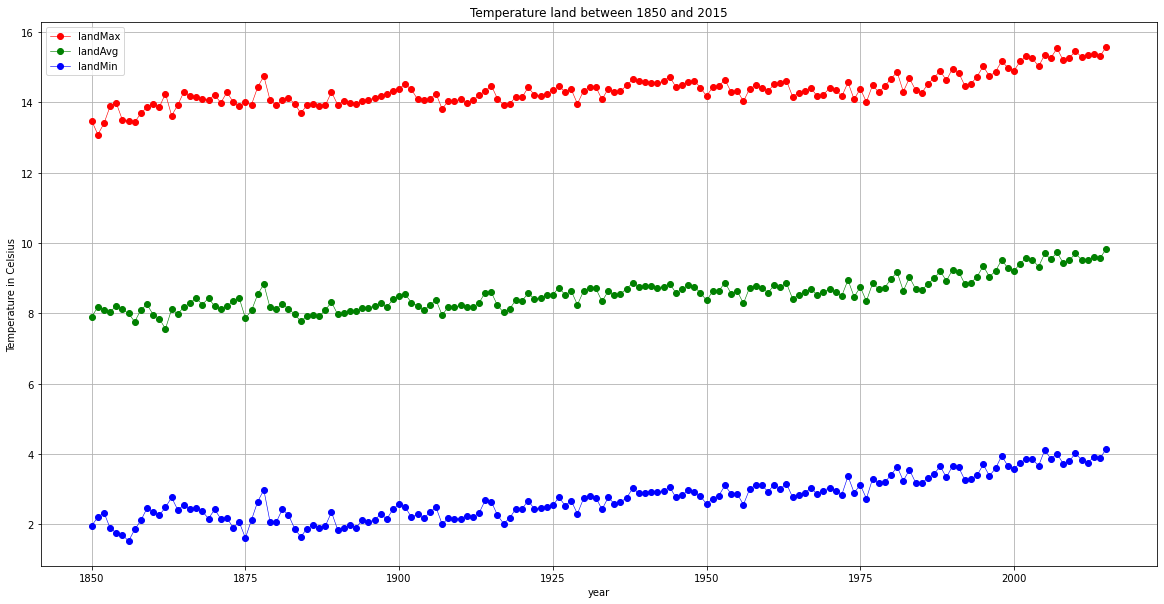

In [47]:
makeThreePlot(tempByYear, 'Temperature land between 1850 and 2015', 'year')

Dla danych po standaryzacji:

In [48]:
tempByYear = standarized_temps.groupby(standarized_temps.index.year).mean()

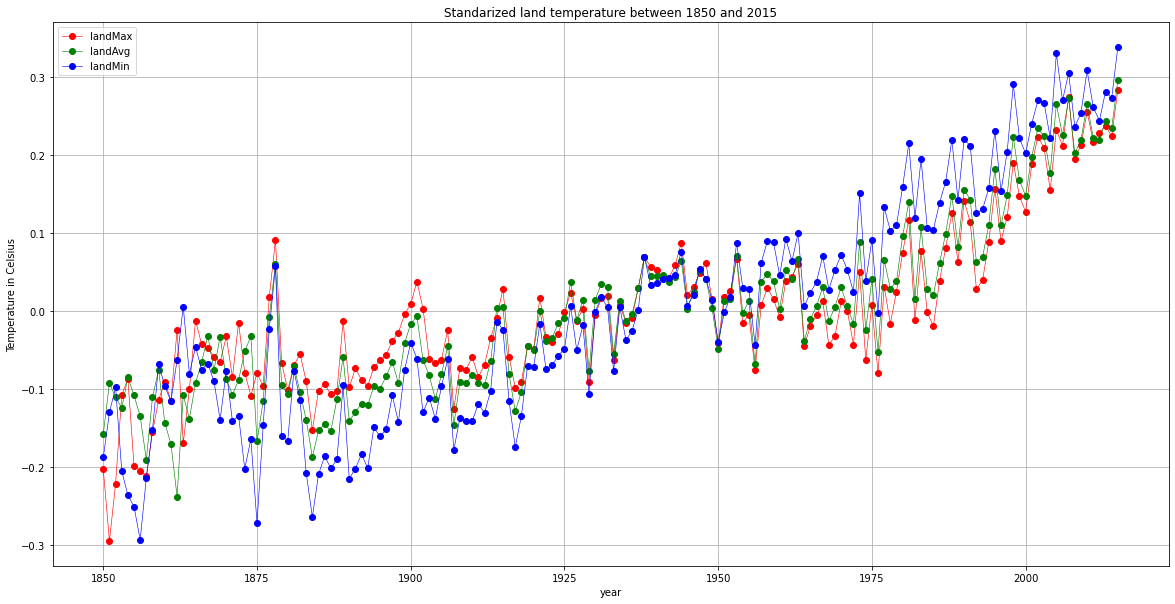

In [49]:
makeThreePlot(tempByYear, 'Standarized land temperature between 1850 and 2015', 'year')

###### Miesięczna:

Dla danych przed standaryzacją:

In [50]:
tempByMonth = temps.groupby(temps.index.month).mean()

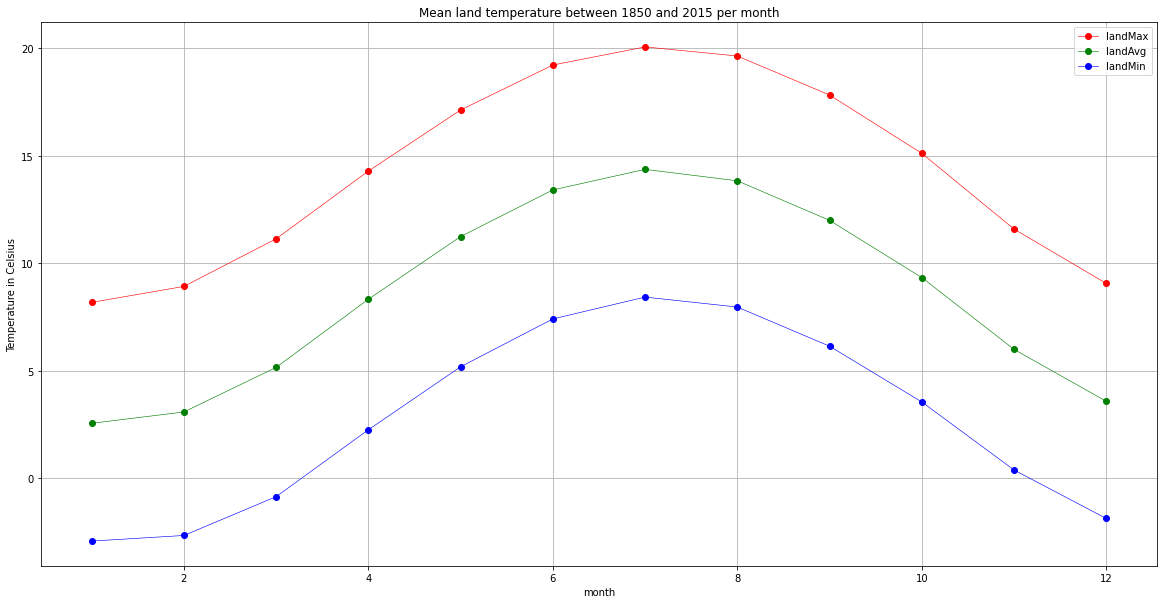

In [51]:
makeThreePlot(tempByMonth, 'Mean land temperature between 1850 and 2015 per month', 'month')

Dla danych po standaryzacji:

In [52]:
tempByMonth = standarized_temps.groupby(standarized_temps.index.month).mean()

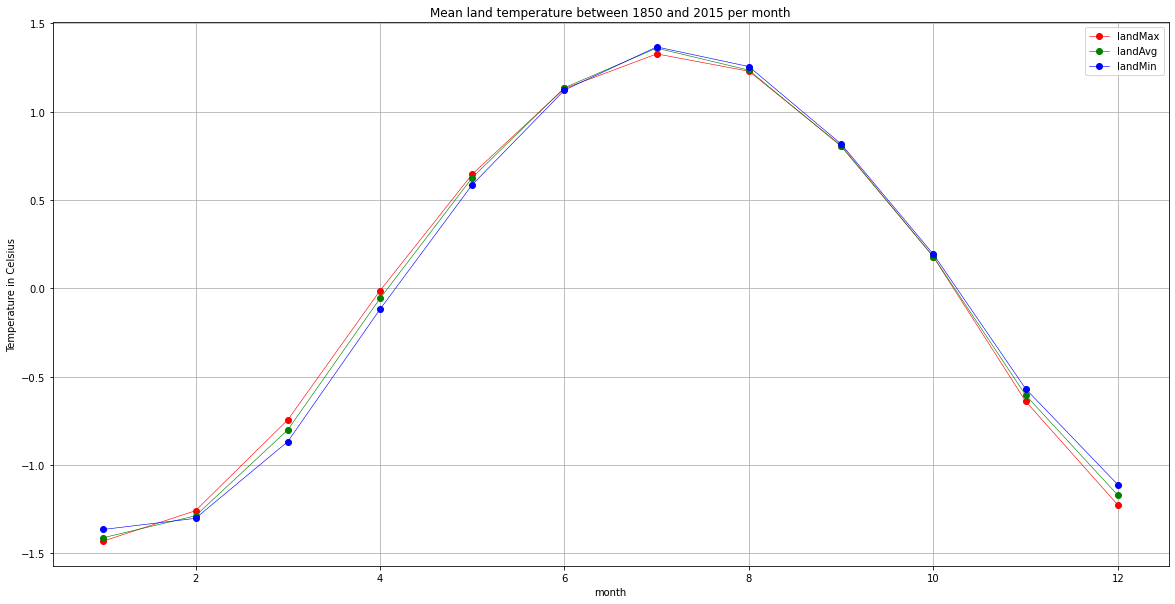

In [53]:
makeThreePlot(tempByMonth, 'Mean land temperature between 1850 and 2015 per month', 'month')

Przedstawienie graficzne wszystkich cech po standaryzacji:

In [54]:
tempByYear = standarized_temps.groupby(standarized_temps.index.year).mean()

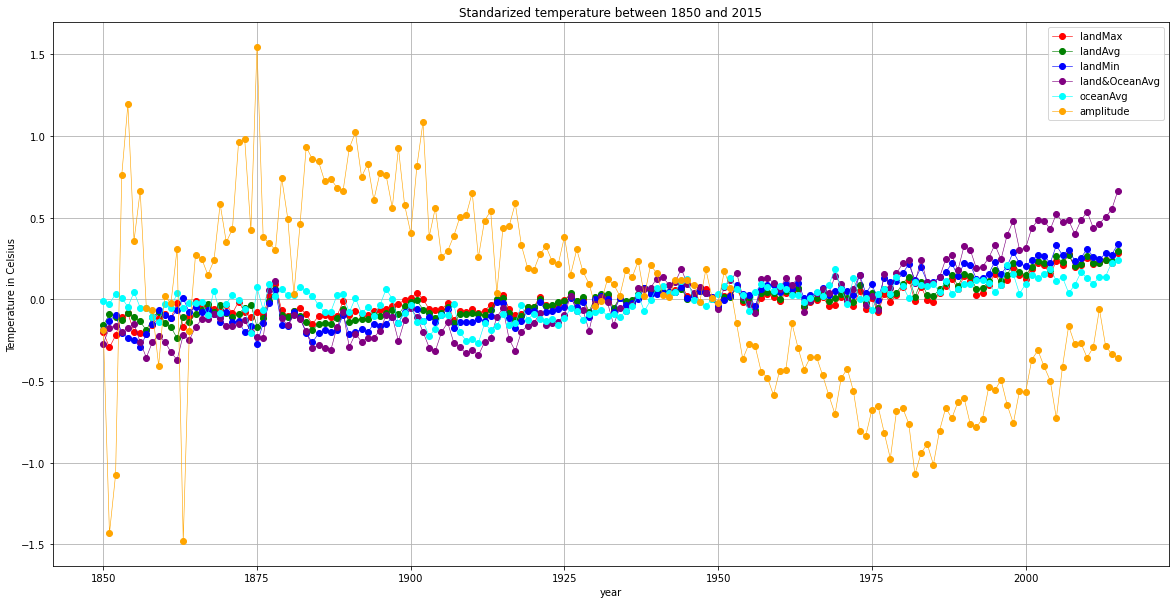

In [55]:
makeThreePlot(tempByYear, 'Standarized temperature between 1850 and 2015', 'year', True)

In [56]:
tempByMonth = standarized_temps.groupby(standarized_temps.index.month).mean()

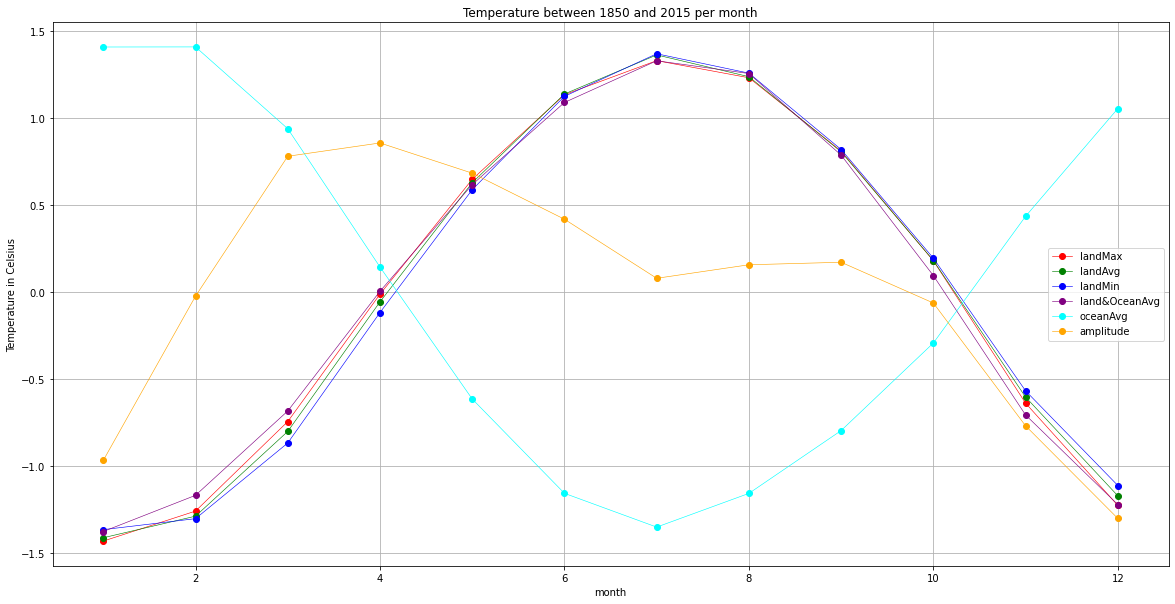

In [57]:
makeThreePlot(tempByMonth, 'Temperature between 1850 and 2015 per month', 'month', True)

### Podsumowanie

Surowe dane pozyskane z ogólno dostępnej bazy danych (kaggle.com), zostały odpowiednio przetworzone oraz zbalansowane, na ten proces złożyły się:
* nadanie cechom krótszych, a przy tym bardziej intuicyjnych nazw
* pozbycie się wierszy z więcej, niż 3 wartościami nieokreślonymi
* dodanie dwóch nowych cech (amplitude, oceanAvg) wywnioskowanych na podstawie informacji zawartych w rozpatrywwanym zbiorze
* utworzenie szeregów czasowych reprezentujących serie pomiarów dla danych cech, które posłużą jako zmienne niezależne (objaśniające) w regresji liniowej
* sprawdzenie występowania wartości odstających
* ustandaryzowanie danych metodą z-score
* przedstawienie graficzne danych